In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
def read_npy(paths,sep=2):
    npys = []
    for i,path in enumerate(paths):
        npys.append(np.load(path))
        if i % sep == 0:
            print(f'{i}:Loading {path} {npys[-1].shape}')
    print(f'Total of {len(npys)} files loaded')
    return npys

In [10]:
!ls ~/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-*.npy

/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-rho.npy
/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-rhop.npy
/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-vel.npy
/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-vp.npy
/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-vrel.npy


In [11]:
tgt_rhog = read_npy(['/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-rho.npy'])[0]

0:Loading /mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-rho.npy (1, 256, 256, 256)
Total of 1 files loaded


In [11]:
tgt_vg = read_npy(['/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-vel.npy'])[0]

0:Loading /mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-vel.npy (3, 256, 256, 256)
Total of 1 files loaded


In [19]:
def plot_single(frame,dpi=600):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=dpi,constrained_layout=True)
    eps = np.unique(frame)[1]
    print('epsilon', eps)
    frame_slice = frame[0,:,:,frame.shape[-1]//2]
    x,y = np.linspace(0,1,256),np.linspace(0,1,256)
    X,Y = np.meshgrid(x,y,indexing='xy')
    ql,qh = np.quantile(frame,[0.12,0.99])
    log_ql, log_qh = np.log10(np.array([ql,qh]))
    im = plt.pcolormesh(X,Y,frame_slice,#np.log10(frame_slice+eps),
                       shading='auto',
                       #vmin=log_ql,
                       #vmax=log_qh,
                       linewidth=0,rasterized=True)
    ax.set_axis_off()
    #ax.tick_params(axis='both',length=0,labelsize=0)
    im.set_edgecolor('face')

epsilon 0.8483881


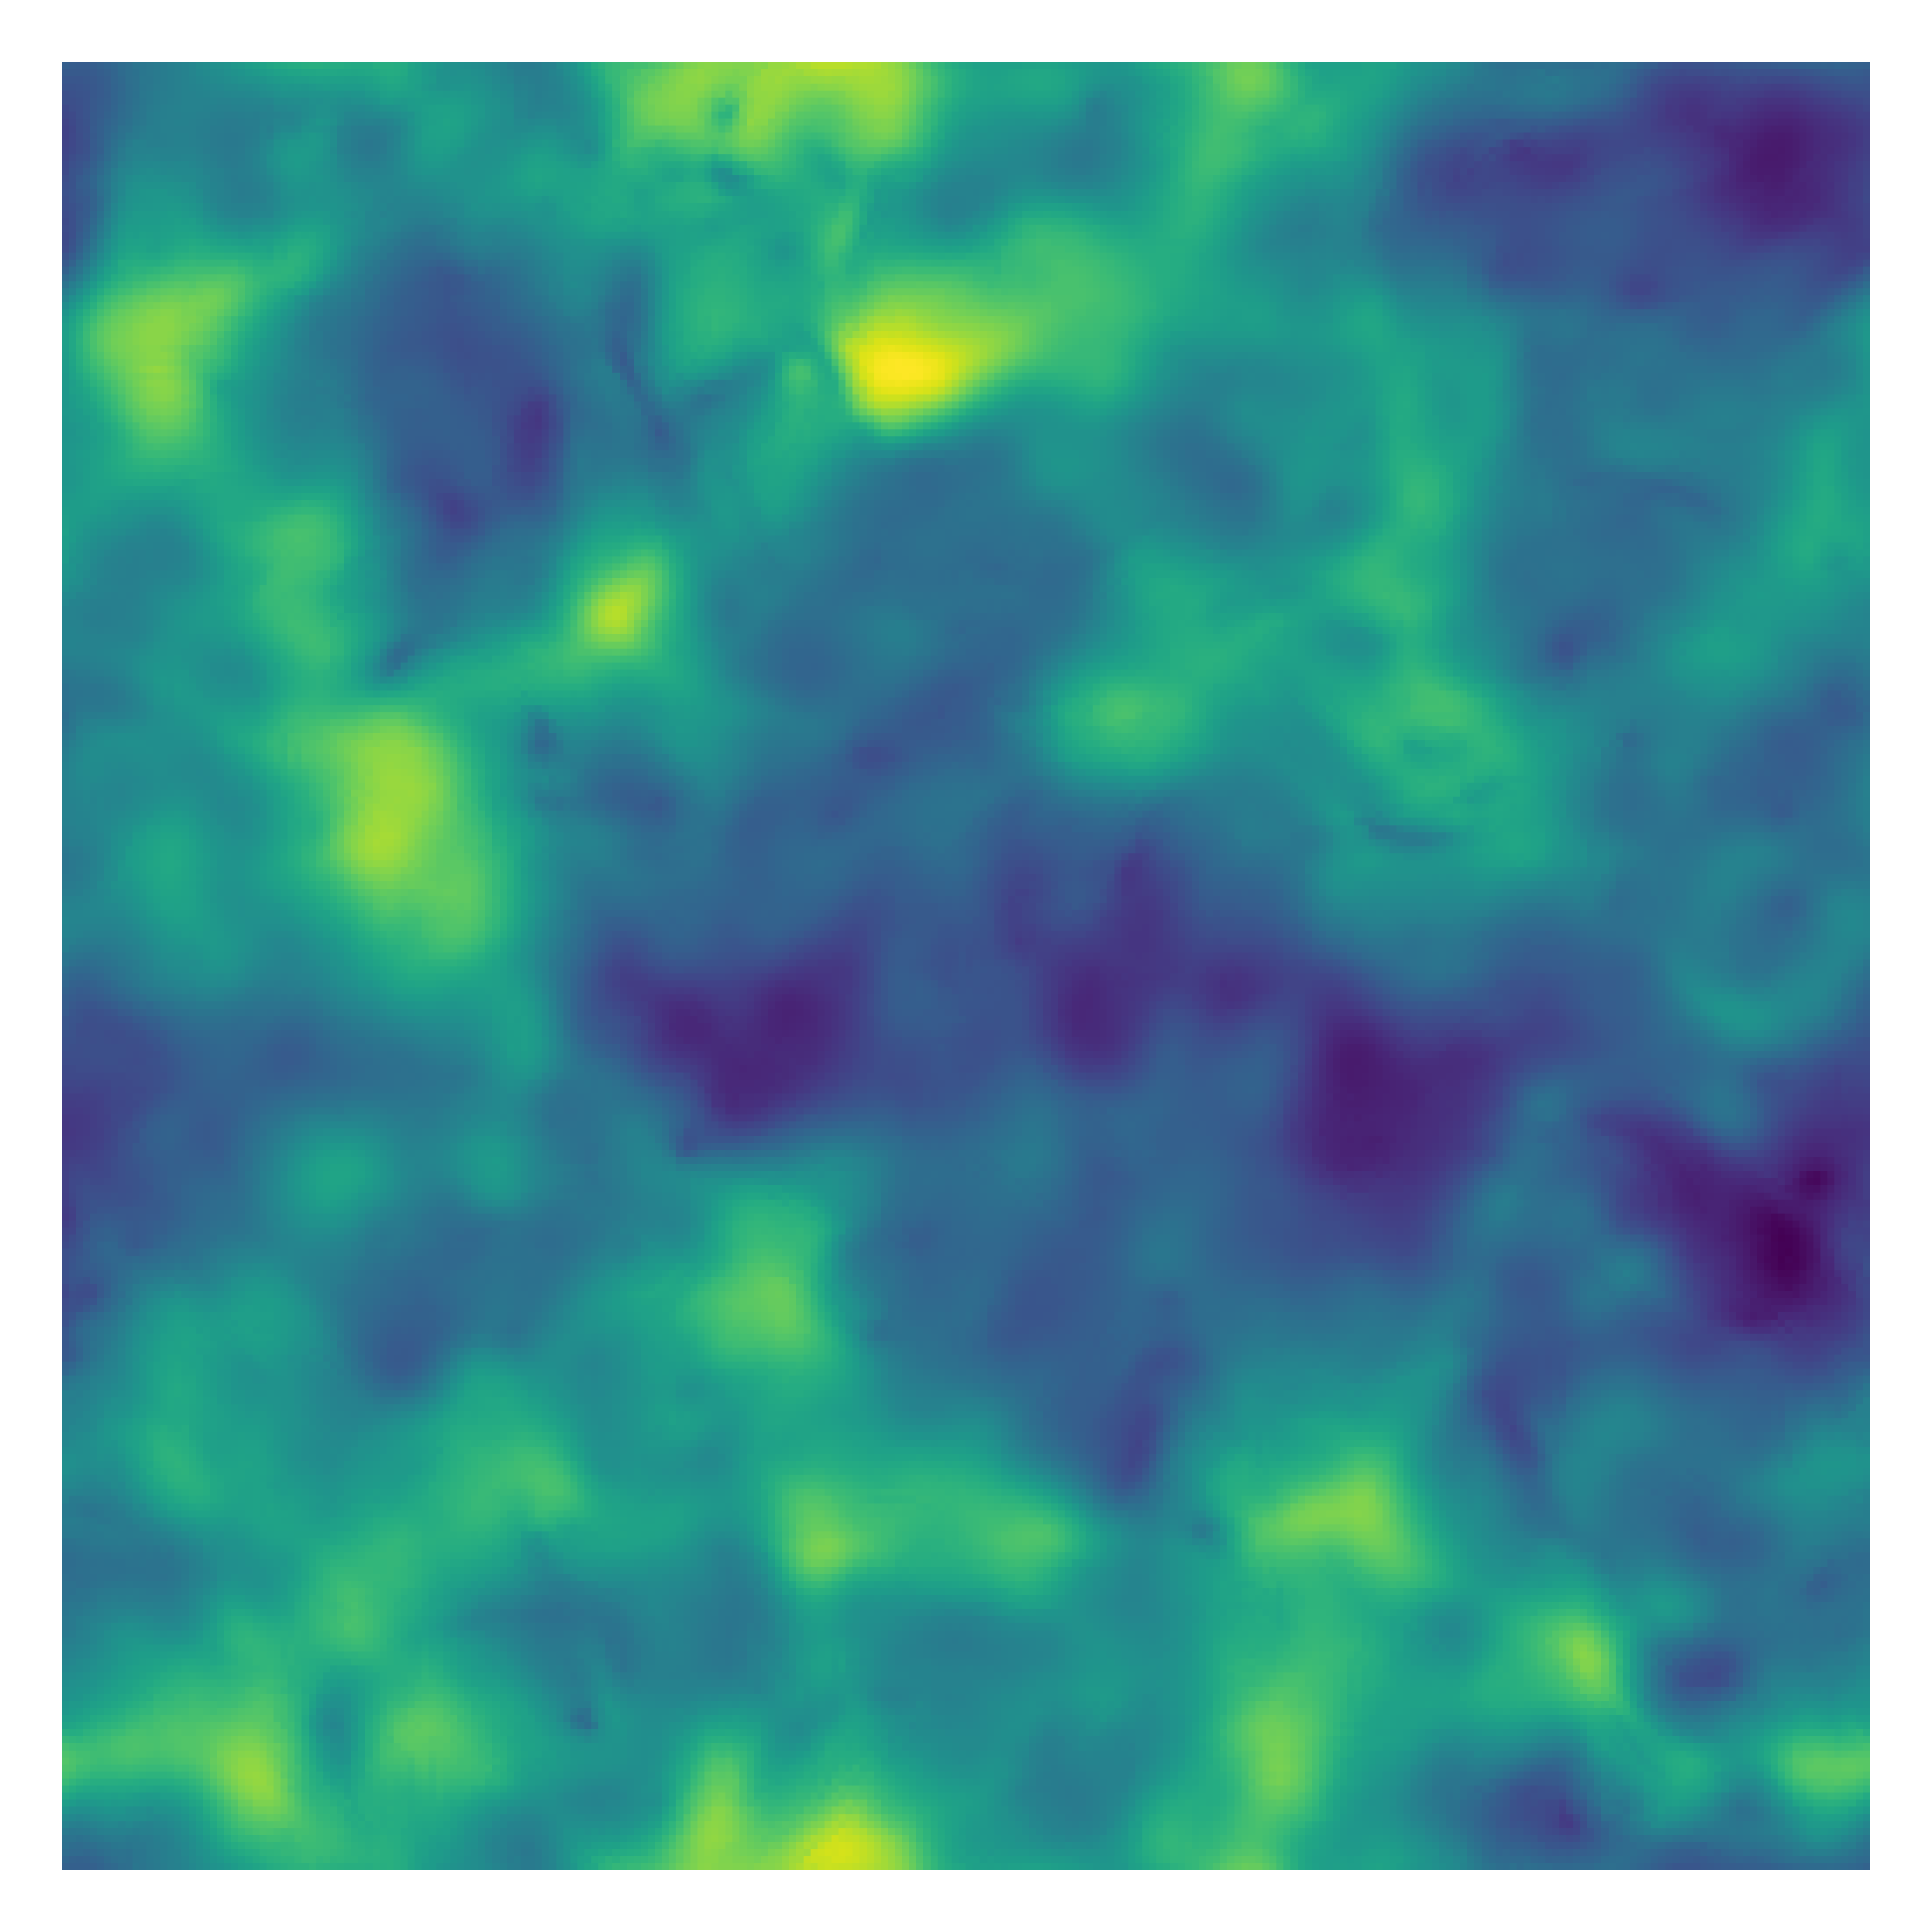

In [20]:
with PdfPages('athena_gas_den.pdf') as pp:
    plot_single(tgt_rhog,dpi=800)
    pp.savefig()
    #pp.close()

In [1]:
import matplotlib.colors as colors

In [7]:
def plot_velc(frame,dpi=600):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=dpi,constrained_layout=True)
    eps = np.unique(frame)[1]
    print('epsilon', eps)
    frame_slice = frame[:,:,frame.shape[-1]//2]
    x,y = np.linspace(0,1,256),np.linspace(0,1,256)
    X,Y = np.meshgrid(x,y,indexing='xy')
    ql,qh = np.quantile(frame,[0.10,0.90])
    #log_ql, log_qh = np.log10(np.array([ql,qh]))
    im = plt.pcolormesh(X,Y,frame_slice,
                       shading='auto', cmap='RdBu_r',
                       #norm=colors.SymLogNorm(linthresh=0.1, linscale=0.1,
                       #                       vmin=ql, vmax=qh, base=10),
                       linewidth=0,rasterized=True)
    ax.set_axis_off()
    #ax.tick_params(axis='both',length=0,labelsize=0)
    im.set_edgecolor('face')

In [28]:
tgt_vg.shape

(3, 256, 256, 256)

epsilon -0.42558834
epsilon -0.44903234
epsilon -0.50248325


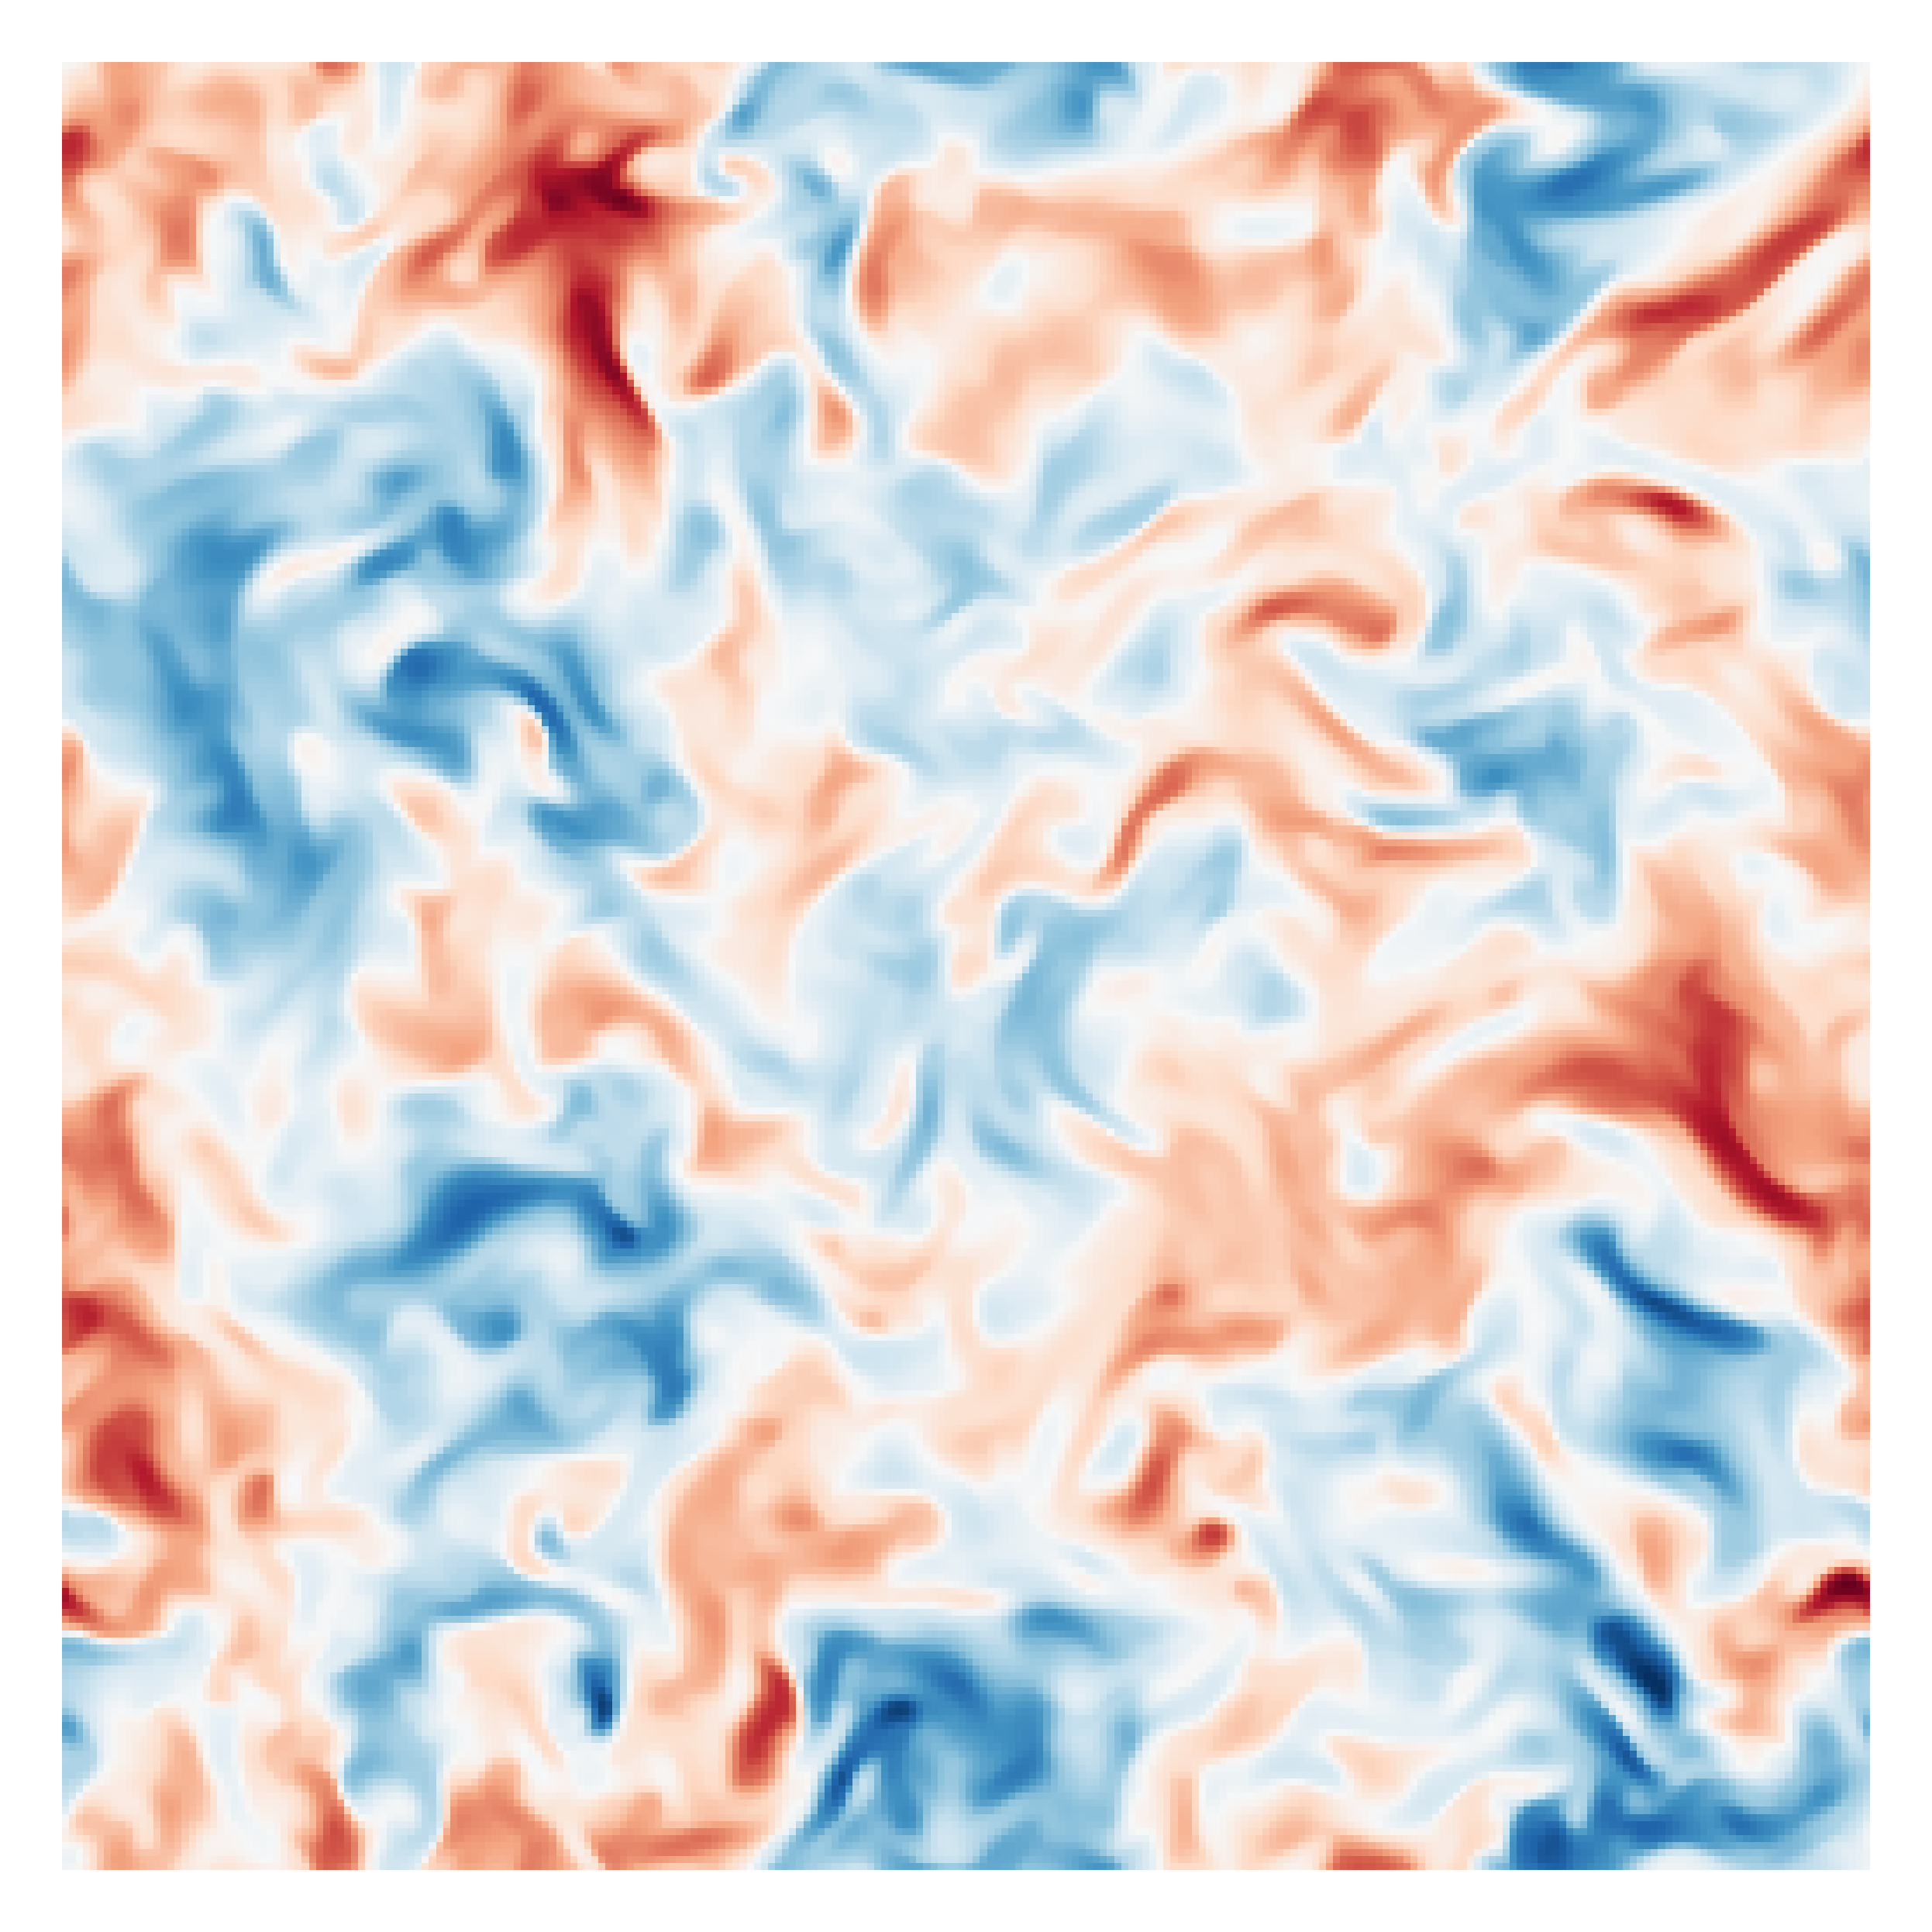

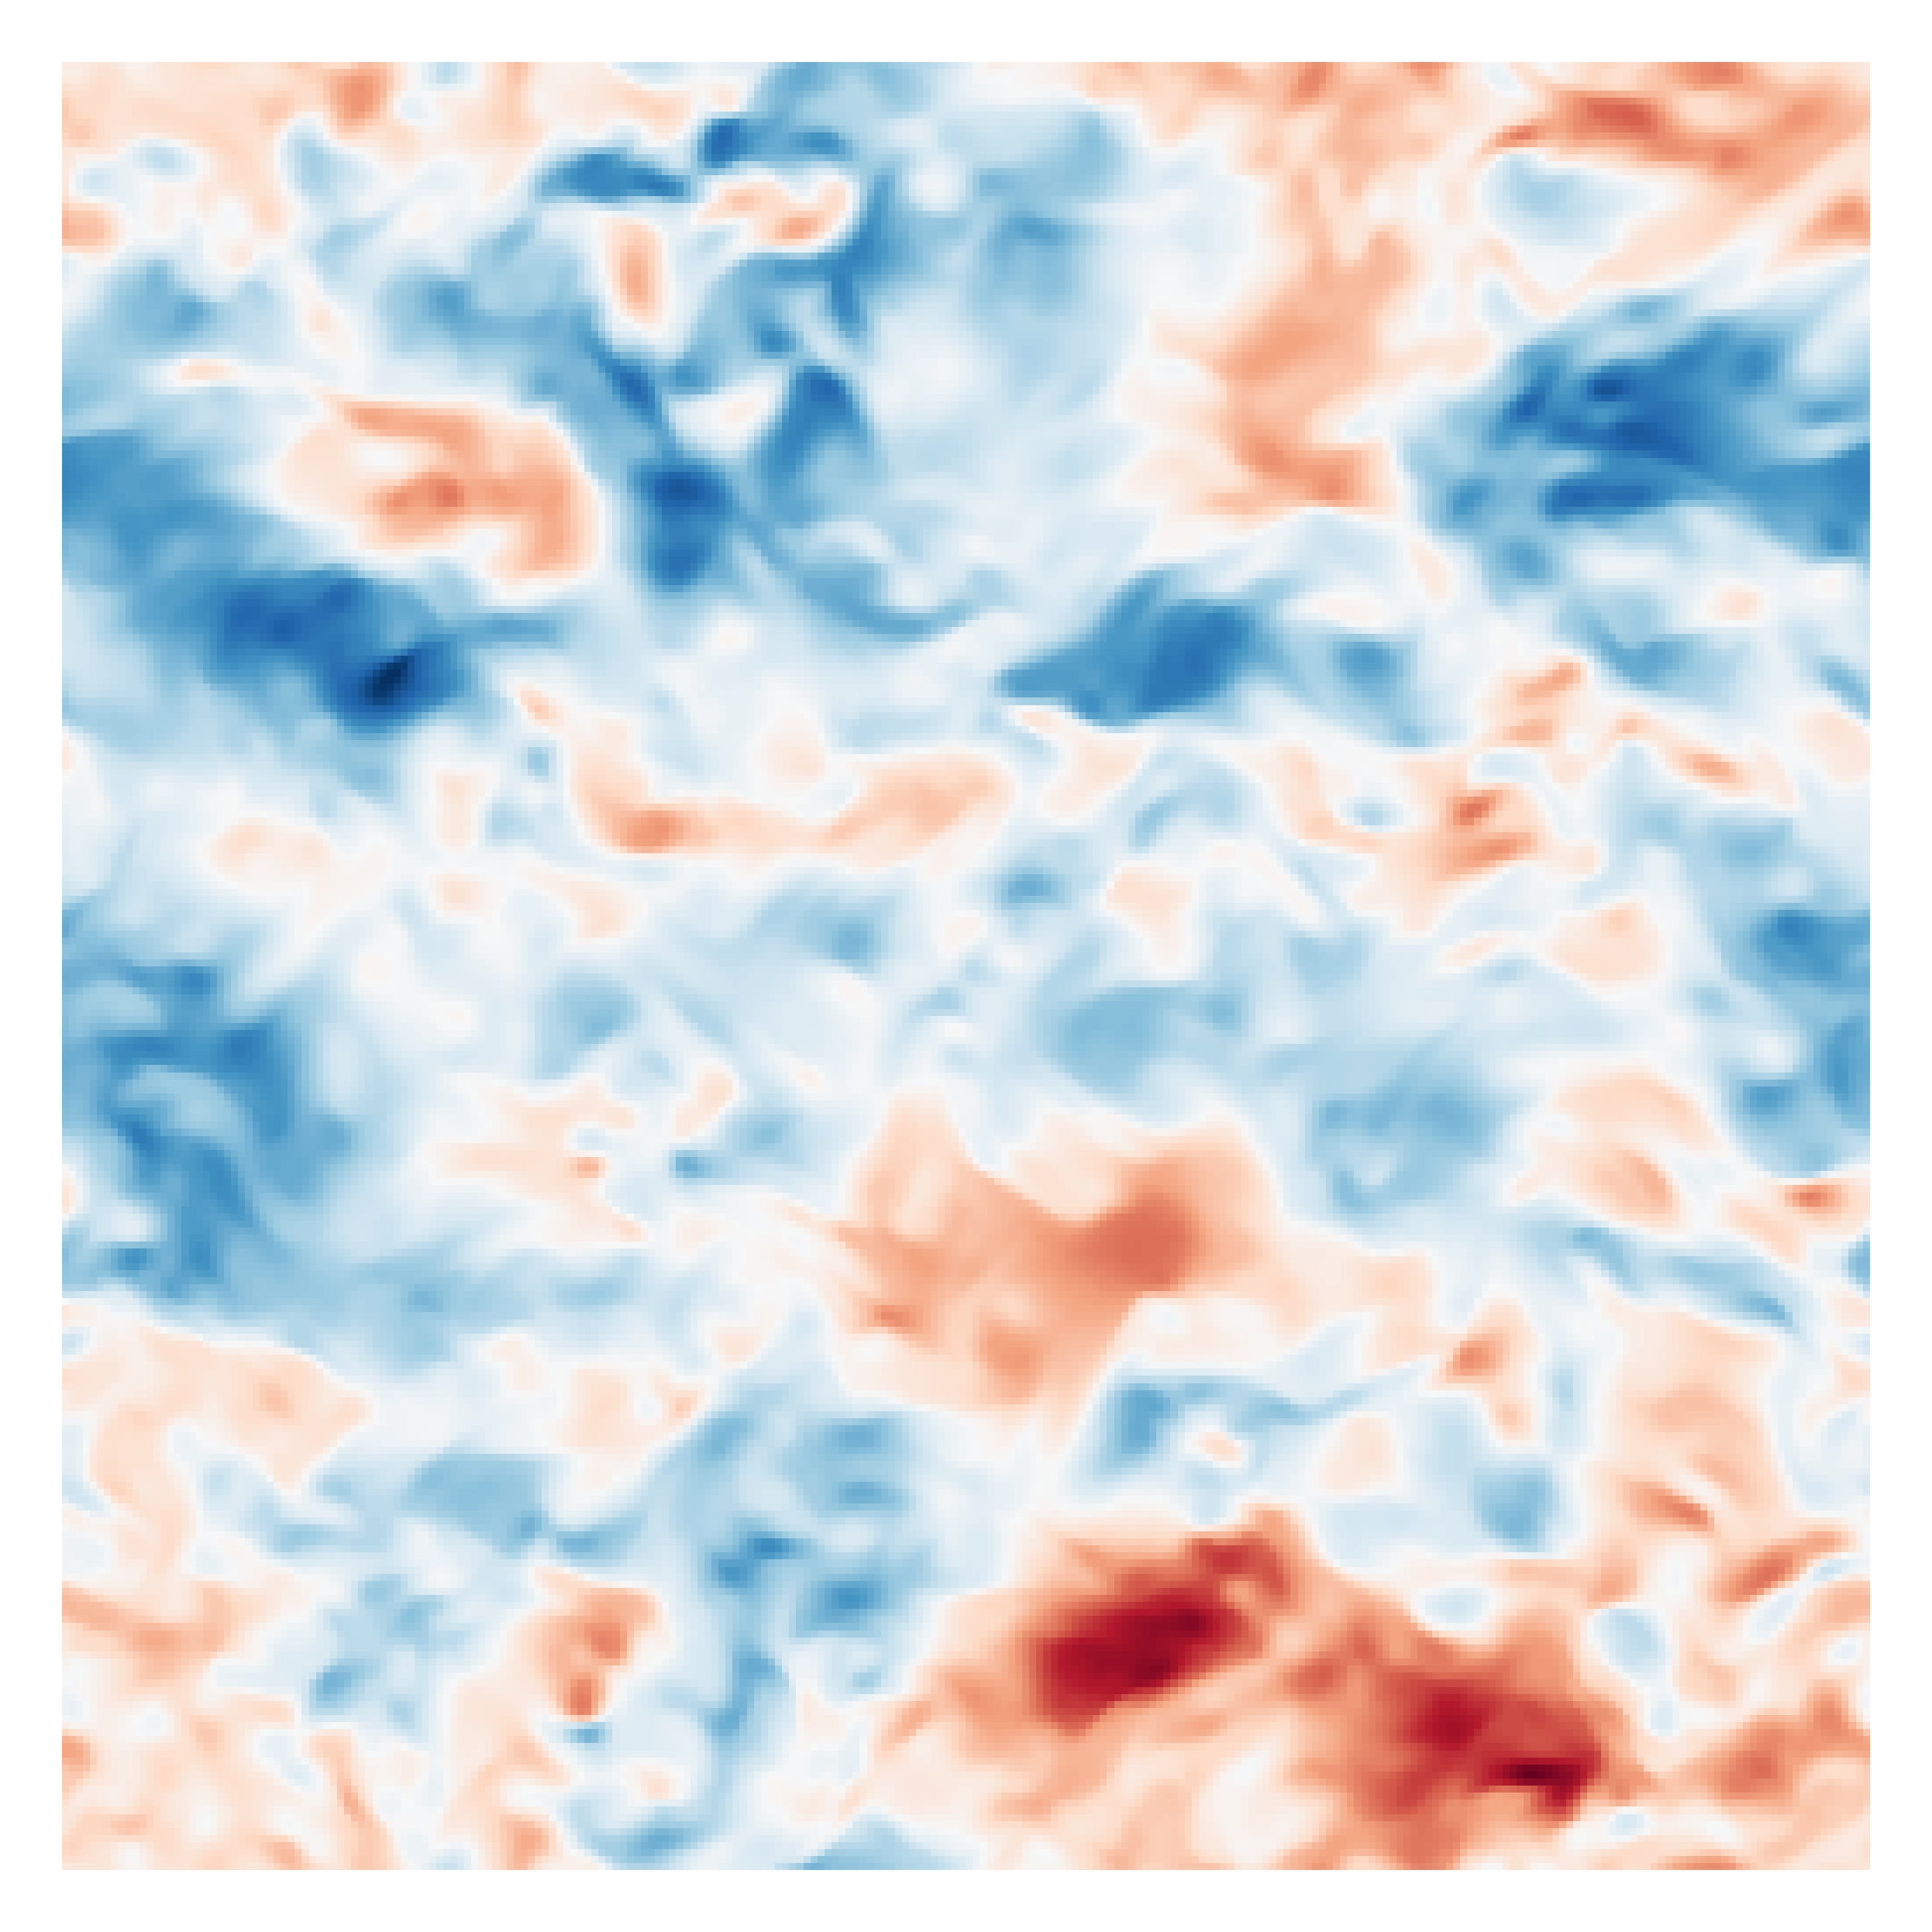

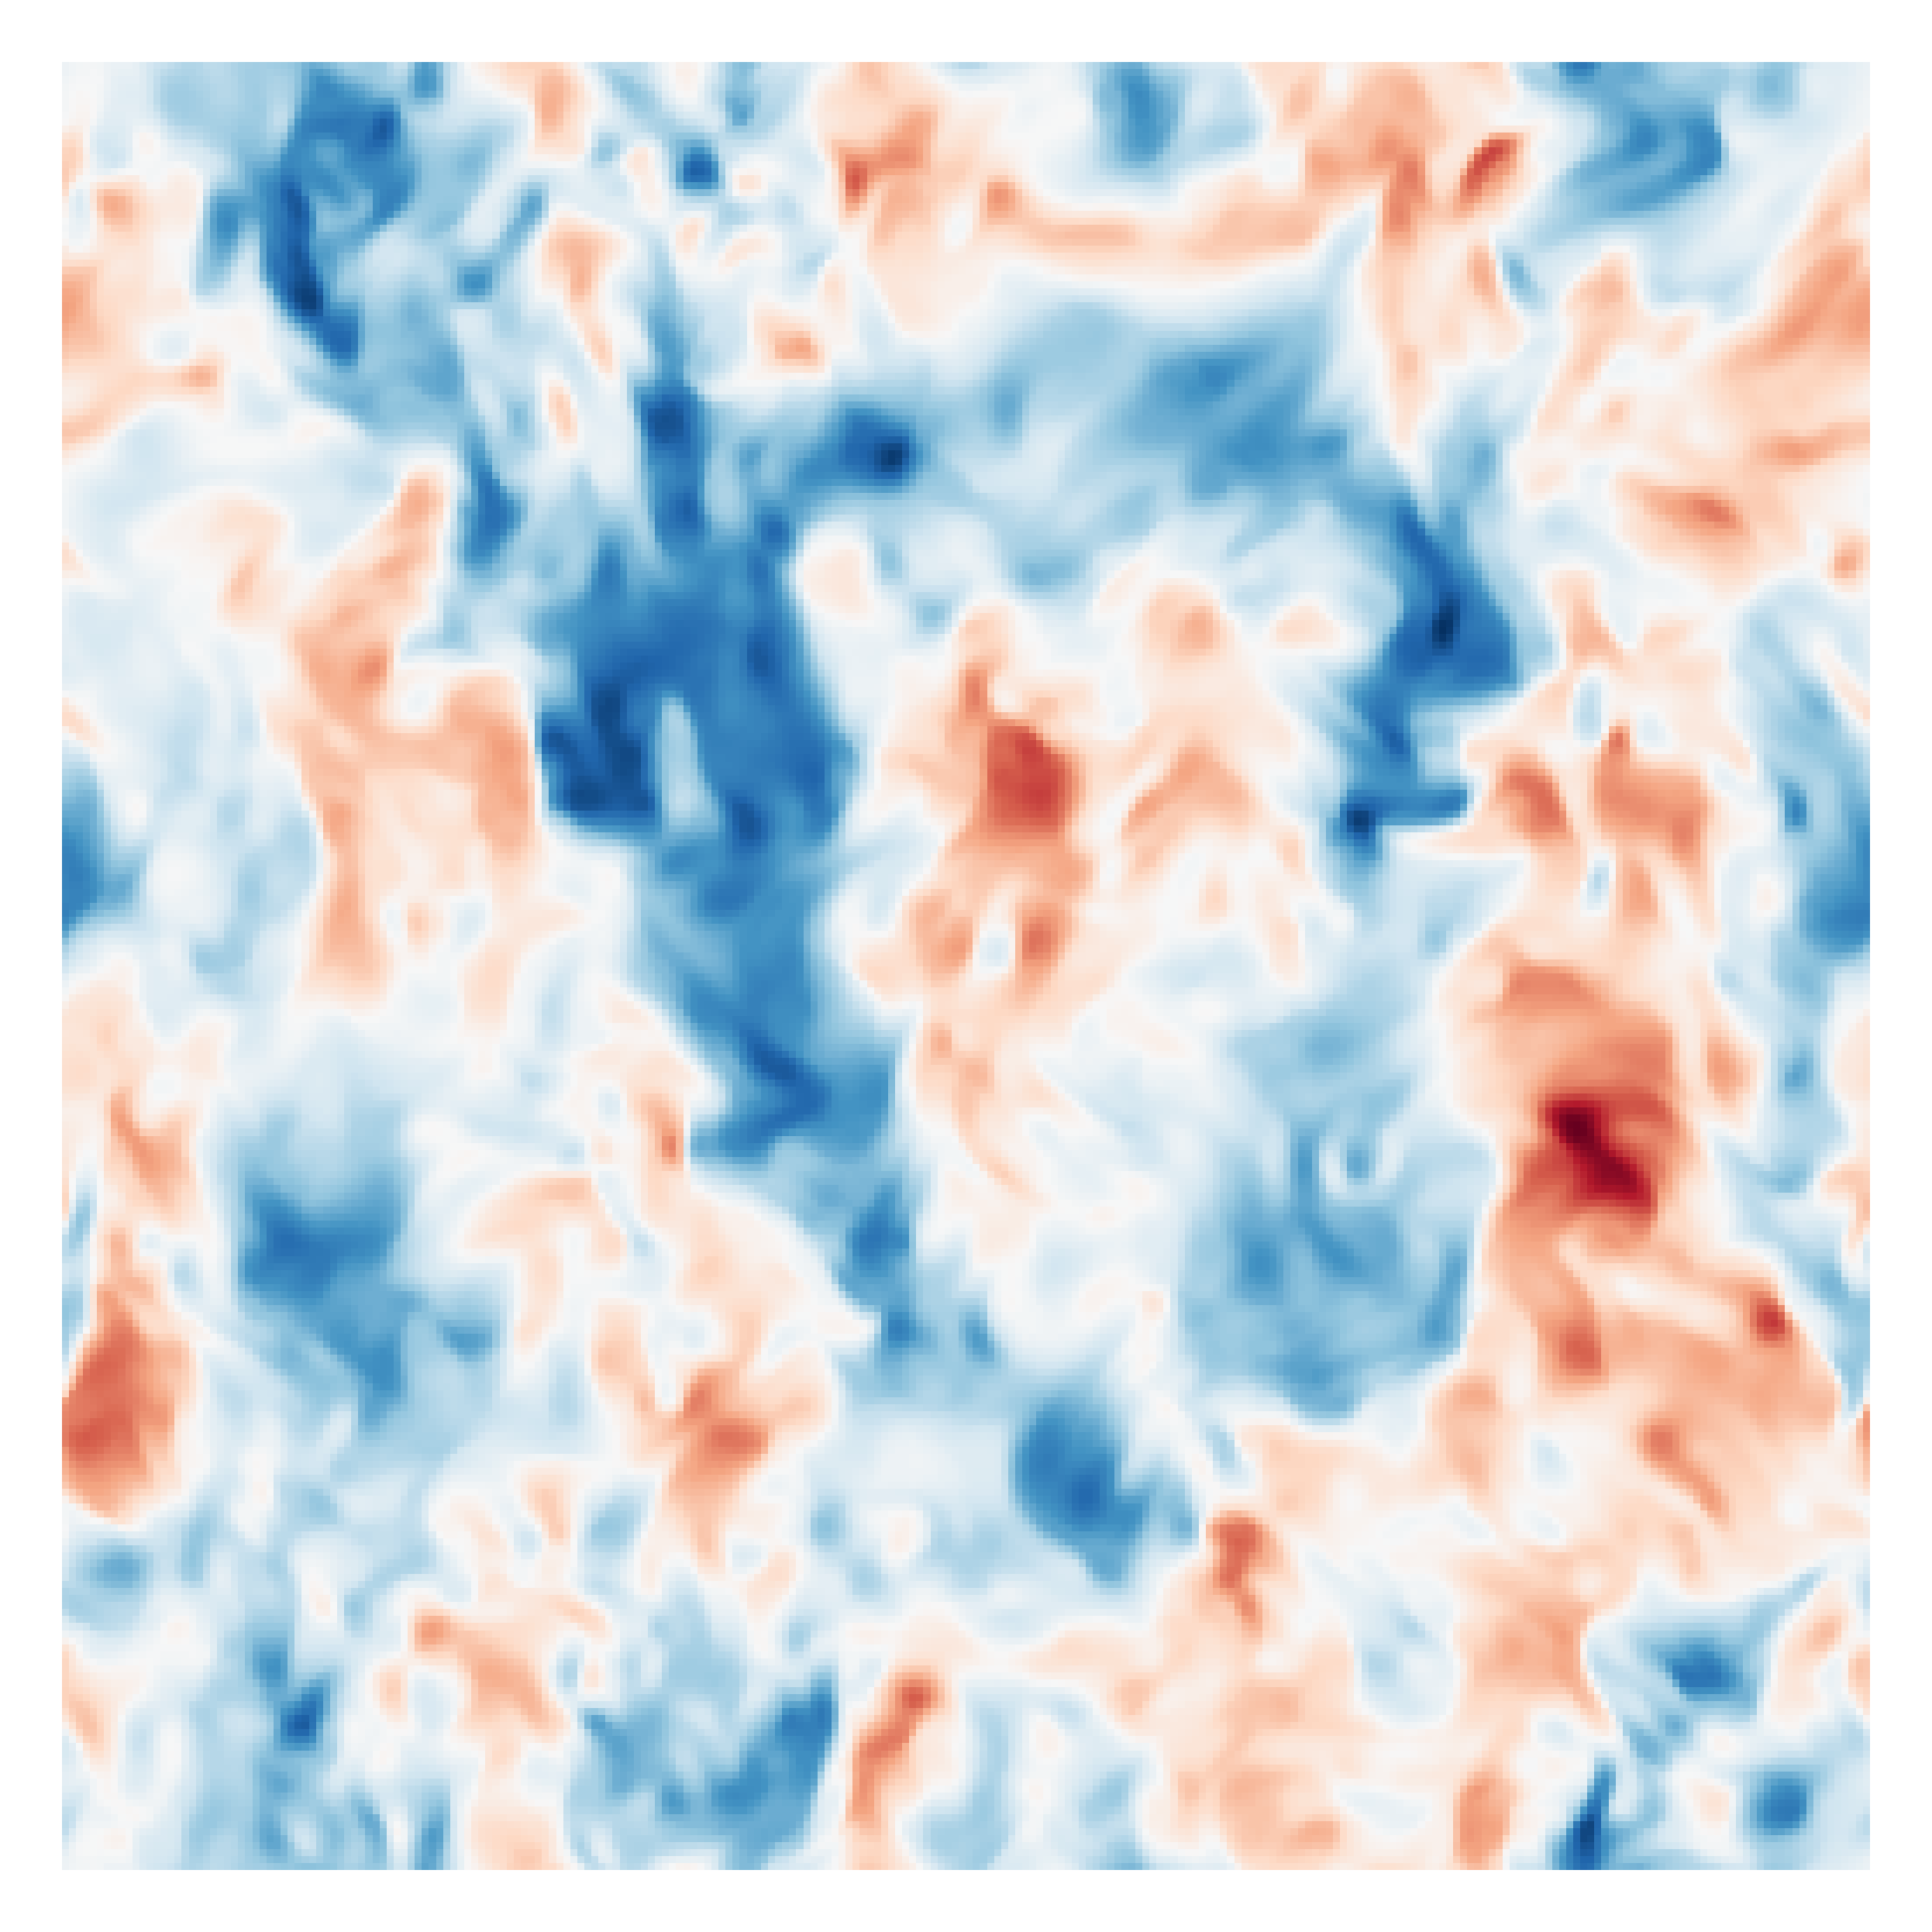

In [32]:
for i in range(3):
    with PdfPages(f'athena_gas_velc_{i+1}.pdf') as pp:
        plot_velc(tgt_vg[i],dpi=800)
        pp.savefig()
    

In [39]:
!ls /mnt/home/tchan1/ceph/mldust-ver2/runs/wvelc-rel-stats-trained-longer3/vp-out/TurbPar.out2.00100.hdf5-vp_out.npy

/mnt/home/tchan1/ceph/mldust-ver2/runs/wvelc-rel-stats-trained-longer3/vp-out/TurbPar.out2.00100.hdf5-vp_out.npy


In [5]:
athena_vp = read_npy(['/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-vp.npy'])[0]

0:Loading /mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-vp.npy (3, 256, 256, 256)
Total of 1 files loaded


In [42]:
unetr_vp = read_npy(['/mnt/home/tchan1/ceph/mldust-ver2/runs/wvelc-rel-stats-trained-longer3/vp-out/TurbPar.out2.00100.hdf5-vp_out.npy'])

0:Loading /mnt/home/tchan1/ceph/mldust-ver2/runs/wvelc-rel-stats-trained-longer3/vp-out/TurbPar.out2.00100.hdf5-vp_out.npy (3, 256, 256, 256)
Total of 1 files loaded


epsilon -0.35015038
epsilon -0.3843811
epsilon -0.41317967


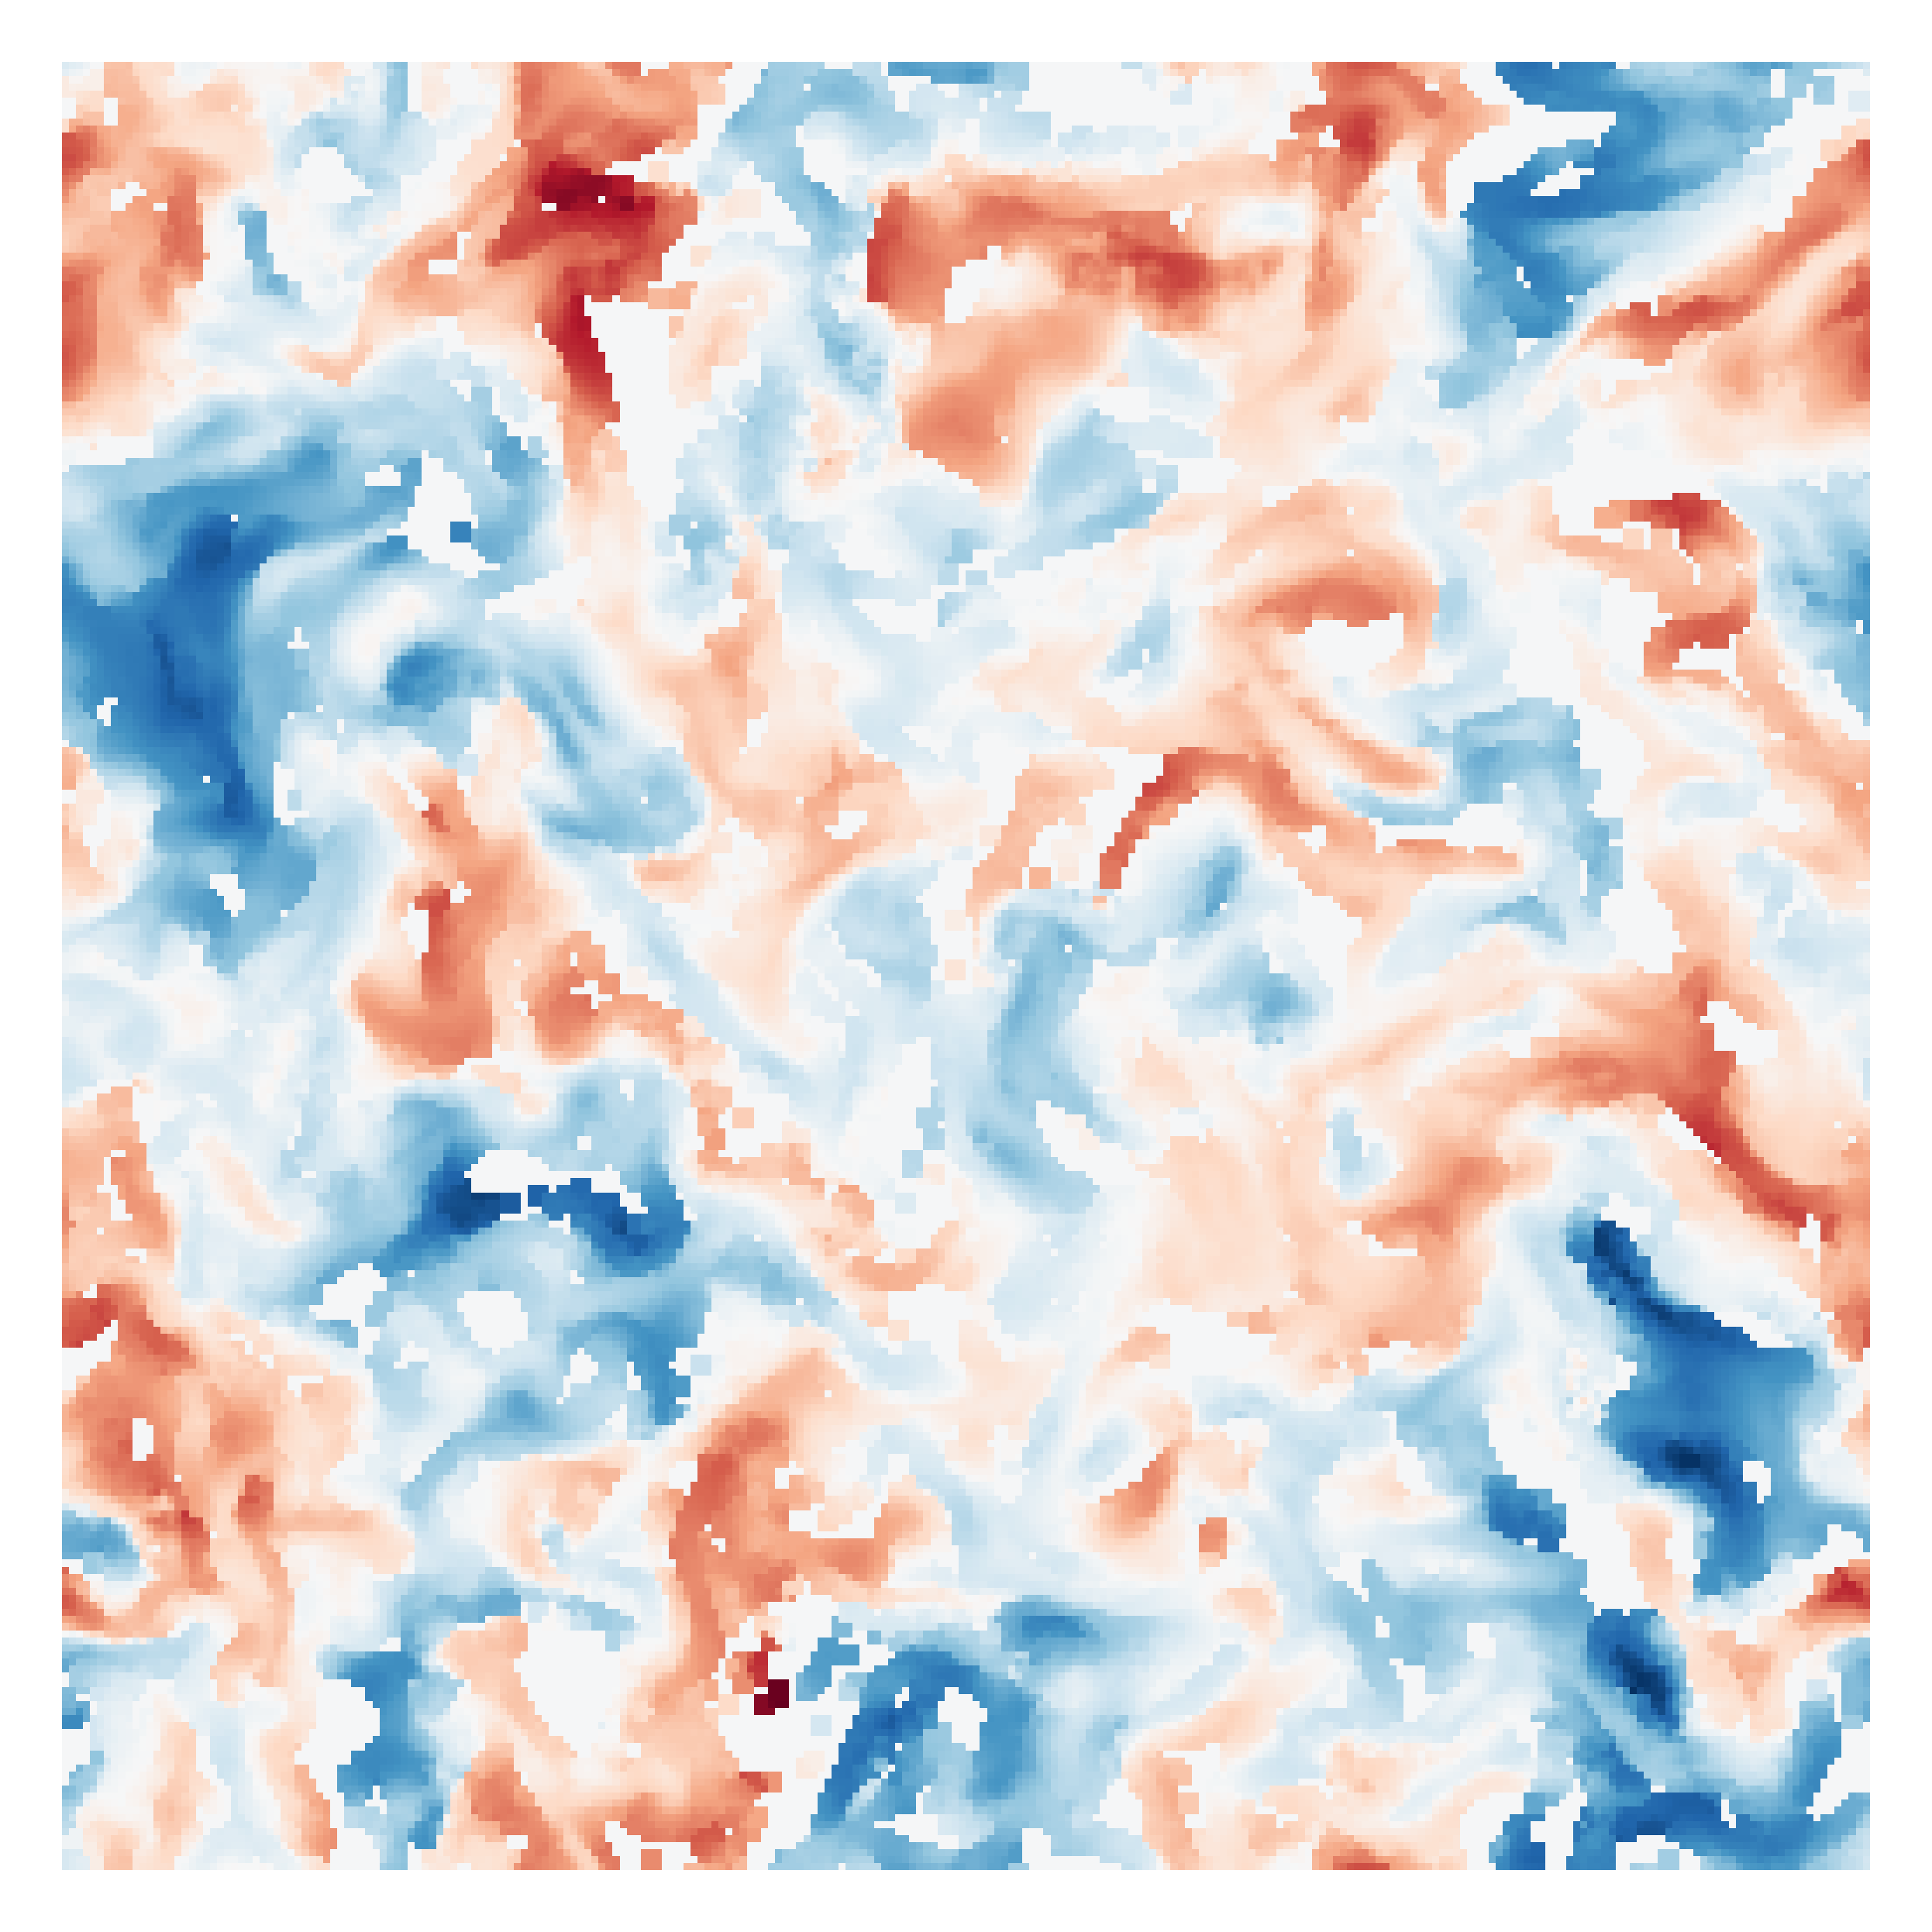

In [ ]:
for i in range(3):
    with PdfPages(f'athena_dust_velc_{i+1}.pdf') as pp:
        plot_velc(athena_vp[i],dpi=800)
        pp.savefig()

In [46]:
#unetr_vp[0]

epsilon -0.40317813
epsilon -0.43050465
epsilon -0.45451742


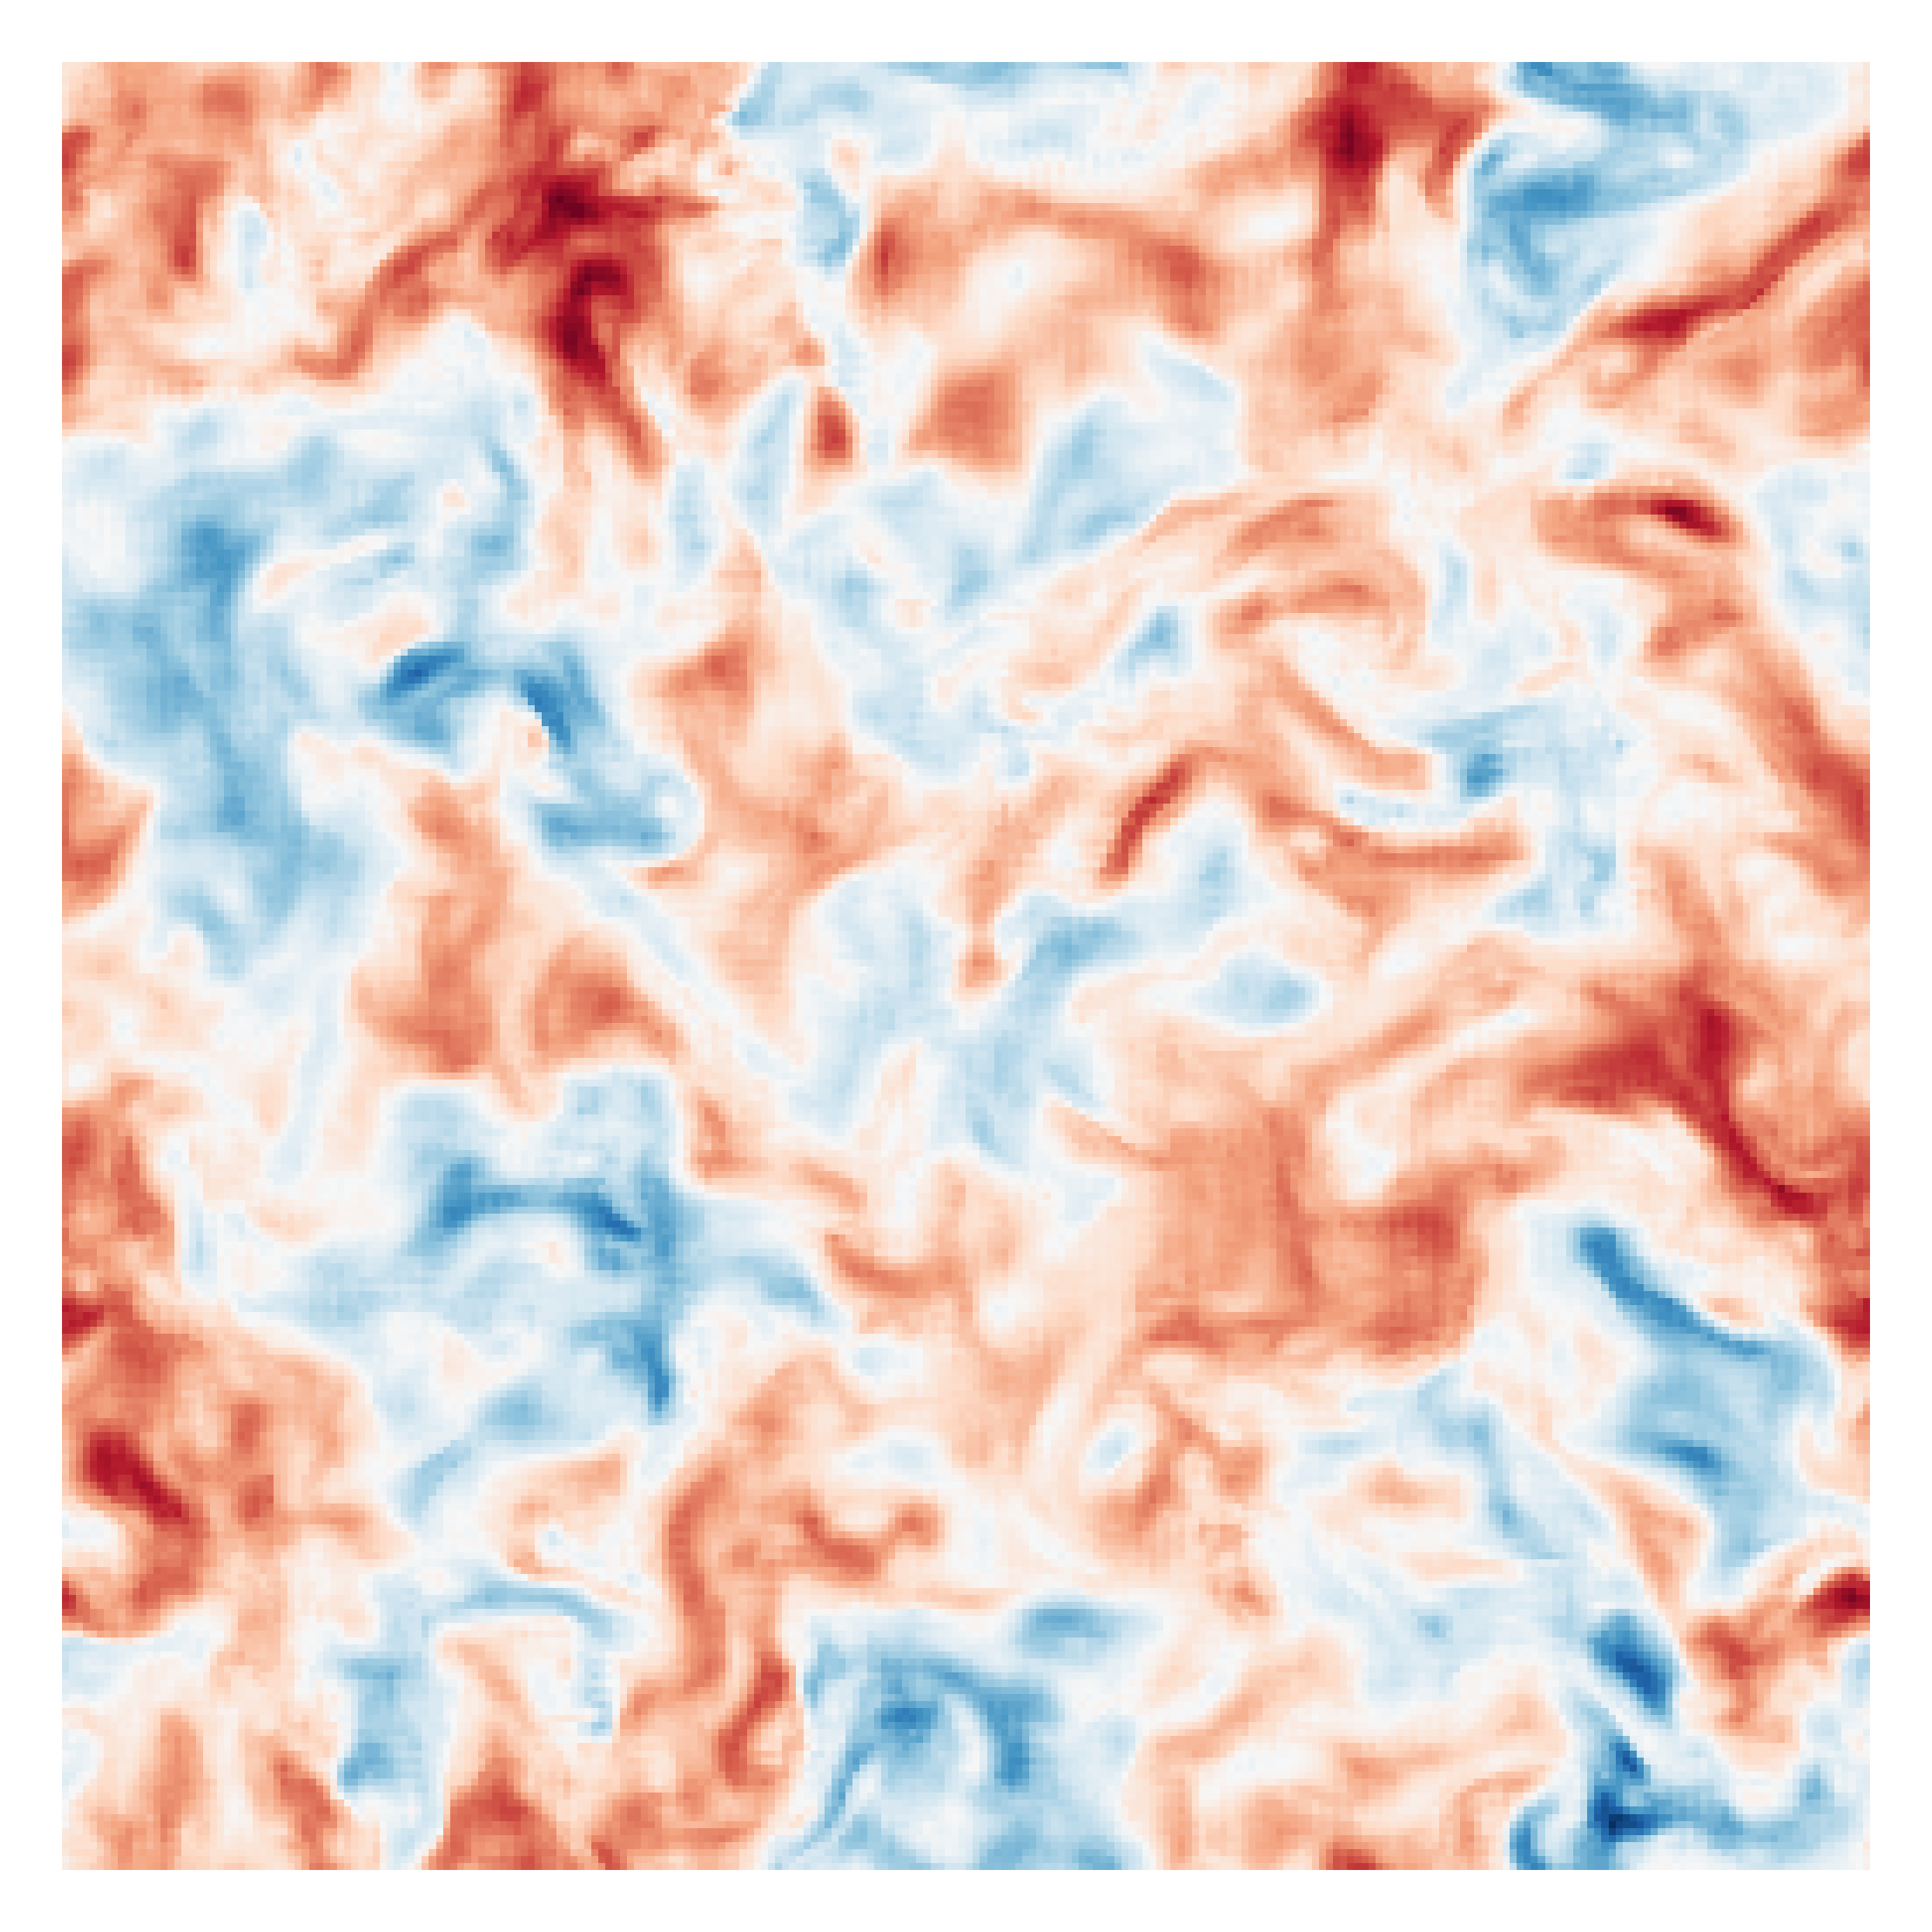

In [ ]:
for i in range(3):
    with PdfPages(f'unetr_dust_velc_{i+1}.pdf') as pp:
        plot_velc(unetr_vp[0][i],dpi=800)
        pp.savefig()
    